<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

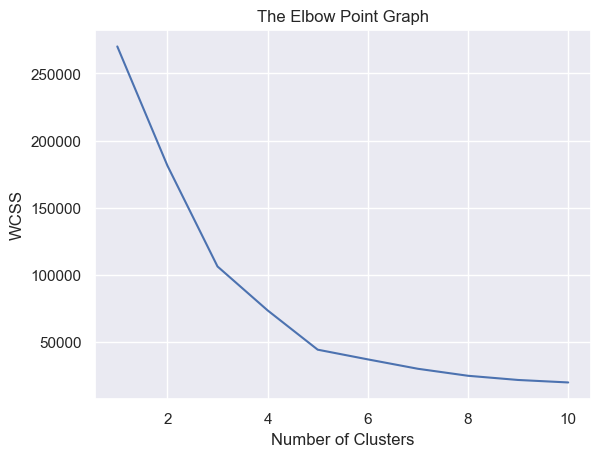

C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Silhouette Score: 0.553931997444648


Enter annual income of customer :  103
Enter spending score of customer :  23


This Customer belongs to cluster no: 2
Customers with low annual income and low annual spend


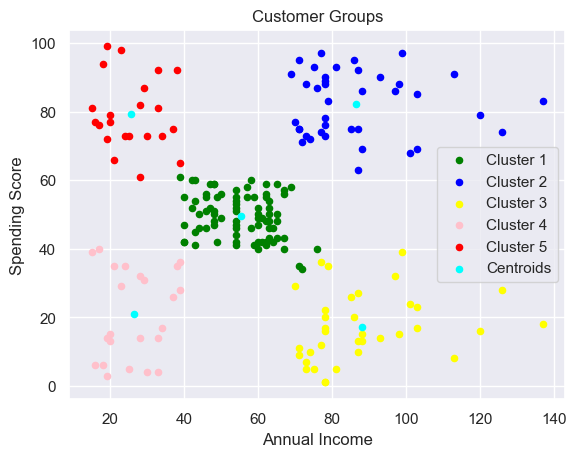

In [9]:
#Unsupervised Learning K-means#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Data collection in pandas data frame#
customer=pd.read_csv('C:/Users/anike/OneDrive/Desktop/Mall_Customers.csv')
customer

#getting shape
customer.shape


#getting some information about dataframe,checking for missing values,no missing values hence we dont need fillna i.e imputation#
customer.isnull().sum()

#seeing datatypes of columns
customer.info()

#seeing 5 values in dataframe
customer.head()


#choosing annual income and spending score column for clustering#
#iloc for locating col here : 3,4 is the cols we will take from data frame and fetch its values and X will cntain that#
X=customer.iloc[:,[3,4]].values

#Choosing the number of Clusters,suitable for dataset#
#WCSS fn, within clusters sum of squares,measures dist btween data pts and centroid and assign the data pt to that cluster with least distance btwn centroid and that data pt#

#finding WCSS values for diff clusters#
#we will find for which cluster WCSS value is least#


#empty list#
wcss=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i, init='k-means++',random_state=42)  #n is number of clusters, for 1st iteration 1 cluster,then 2,3....so on.,we initialize this with kmeans#
    kmean.fit(X)
    
    wcss.append(kmean.inertia_) #.inertia_ gives wcss values for each clusters created in first line of loop#
    
    
#Plot an Elbow graph#

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


#Optimal number of Clusters=5#

#Training the K-Means Clustering Model,in our var kmean#

kmean=KMeans(n_clusters=5,init='k-means++',random_state=0)


#return a label for each data point based on their clusters,cluster number#

#how many points belong to which clusters#
Y=kmean.fit_predict(X)

print(Y)


#Visualizing all the clusters, using scatter plot of matplotlib#


#here X[Y==0,0] the first 0 is the cluster number, the second 0 is the column number of annual income in our X data frame#
#for second X[Y==0,1], represents y axis,where in X[Y==0,1] , 0 is cluster number and 1 is col1 i.e spending score of X dataframe#

plt.scatter(X[Y==0,0] , X[Y==0,1], s=20 , c='green' , label="Cluster 1")
plt.scatter(X[Y==1,0] , X[Y==1,1], s=20 , c='blue' , label='Cluster 2')
plt.scatter(X[Y==2,0] , X[Y==2,1], s=20 , c='yellow' , label='Cluster 3')
plt.scatter(X[Y==3,0] , X[Y==3,1], s=20 , c='pink' , label='Cluster 4')
plt.scatter(X[Y==4,0] , X[Y==4,1], s=20 , c='red' , label='Cluster 5')

#plot the centroids of on basis of which clustering is done#
#here [:,0] represents the x axis coordinate and [:,1] represents y axis coordinate of centroids#
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=20,c='cyan',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

#Accuracy measure of the model with silhouette score#
#The silhouette score is a metric used to evaluate the quality of a clustering algorithm by measuring how well data points are assigned to clusters: 
#it measures the silhouette score measures how similar a data point is to its own cluster compared to other clusters. It's a value between -1 and 1,
#value near 1 means point is close to cluster, value near -1 represents bad clusters i.e far away from cluster#

from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, Y)
print(f'Silhouette Score: {silhouette_avg}')




#########################################################################################################

import joblib
joblib.dump(kmean,"customer_segment")


#load it to our kmean model to another var model#
model=joblib.load("customer_segment")
model.predict([[15,39]])


#UI#

p1=int(input("Enter annual income of customer : "))
p2=int(input("Enter spending score of customer : "))
    
model = joblib.load('customer_segment')
result=model.predict([[p1,p2]])
print("This Customer belongs to cluster no:", result[0])
    
if result== 0:
    print("Customers with medium annual income and medium annual spend")
elif result==1:
    print("Customers with high annual income but low annual spend")
elif result==2:
    print("Customers with low annual income and low annual spend")
elif result==3:
    print("Customers low annual income but high annual spend")
elif result==4:
    print("Customers with high annual income and high annual spend")
